170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


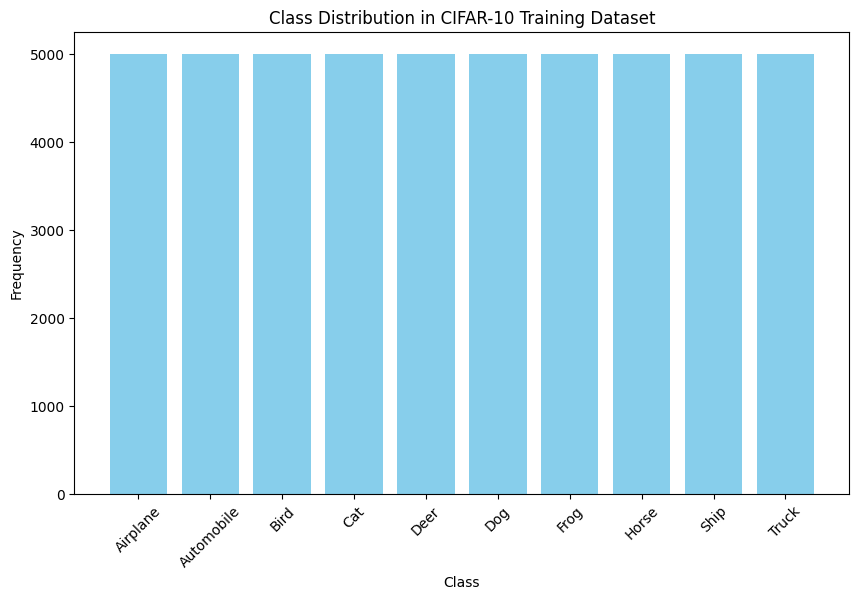

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Menghitung distribusi kelas di data latih
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Menampilkan distribusi kelas sebagai grafik batang
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xticks(range(10),
           ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
           rotation=45)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in CIFAR-10 Training Dataset')
plt.show()


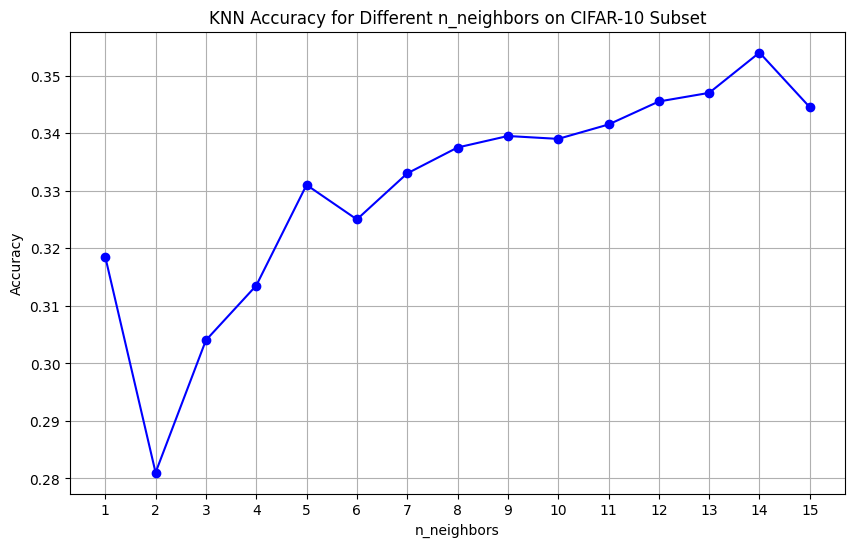

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Mengubah dimensi label menjadi 1D
y_train = y_train.ravel()
y_test = y_test.ravel()

# Mengambil subset data (misalnya 10.000 gambar untuk data latih dan 2.000 gambar untuk data uji)
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

# Meratakan gambar menjadi vektor berdimensi 3072
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Standarisasi fitur
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

# Mengurangi dimensi dengan PCA
pca = PCA(n_components=50)  # Menurunkan dimensi menjadi 50
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Inisialisasi list untuk menyimpan akurasi
accuracies = []

# Mencoba nilai n_neighbors dari 1 hingga 15
neighbors_range = range(1, 16)
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)  # n_jobs=-1 untuk menggunakan semua inti prosesor
    knn.fit(x_train_pca, y_train)
    y_pred = knn.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Visualisasi akurasi
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracies, marker='o', color='b', linestyle='-')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different n_neighbors on CIFAR-10 Subset')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()
